In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [13]:
# Read Receipts into dataframe
receipts= "Data/tourist_receipt.csv"
receipts_df = pd.read_csv(receipts)

receipts_df.head()

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,AUS,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.718900e+10,2.690900e+10,3.106400e+10,3.431500e+10,3.413700e+10,3.288900e+10,3.361900e+10,3.087200e+10,3.447500e+10,NaN
1,Brazil,BRA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.109000e+09,5.635000e+09,5.522000e+09,6.370000e+09,6.623000e+09,6.784000e+09,7.405000e+09,6.254000e+09,6.613000e+09,NaN
2,Canada,CAN,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.819100e+10,1.556800e+10,1.843800e+10,1.998900e+10,2.069600e+10,2.094100e+10,2.080200e+10,1.927300e+10,1.827800e+10,NaN
3,China,CHN,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.084300e+10,3.967500e+10,4.581400e+10,4.846400e+10,5.002800e+10,5.166400e+10,4.404400e+10,4.496900e+10,4.443200e+10,NaN
4,France,FRA,"International tourism, receipts (current US$)",ST.INT.RCPT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.800100e+10,5.885800e+10,5.618700e+10,6.608700e+10,6.400000e+10,6.606000e+10,6.738200e+10,5.295900e+10,5.088300e+10,NaN


In [19]:
#Create dataframe for winning countries
receipts_winners_df =  receipts_df.loc[receipts_df["Country_Name"].isin(['Brazil','Germany','Italy','Spain'])]


# Set the 'Country name' to be our index for easy referencing of rows and drop colmns we dont need
receipts_winners_df = receipts_winners_df.set_index("Country_Name")
receipts_winners_df.drop([ 'Country_Code', 'Indicator_Code', 'Indicator_Name'], axis=1, inplace=True)

receipts_control_df = receipts_df.loc[receipts_df["Country_Name"].isin(['Australia','Canada','China','France','India','Indonesia','Japan','Korea, Rep.','Mexico','Netherlands','Russian Federation','Saudi Arabia','Switzerland','Turkey','United Kingdom','United States'])]
#arrivals_Control_df = arrivals_df.loc[(arrivals_df["Country Name"] == "UK") | (arrivals_df["Country Name"] == "France") | (arrivals_df["Country Name"] == "Brazil") ]
receipts_control_df = receipts_control_df.set_index("Country_Name")

receipts_control_df.drop([ 'Country_Code', 'Indicator_Code', 'Indicator_Name'], axis=1, inplace=True)
# receipts_control_df.head()

# # find the average of arrivals between control countries
mean=receipts_control_df.mean(axis=0)


In [20]:
keys = receipts_control_df.mean()
years = receipts_control_df.keys()
years

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017'],
      dtype='object')

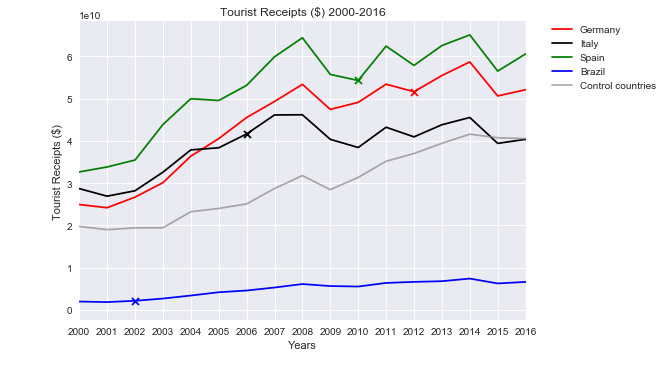

In [22]:
# Plot the number of arrivals for each country and add marker X for the winning year
plt.plot(years, receipts_winners_df.loc['Germany', years], 
         color="red", label="Germany")
plt.scatter( (receipts_winners_df.loc['Germany'].keys()[52]),receipts_winners_df.loc['Germany', '2012'],  color="red",marker='x',label='_nolegend_')


plt.plot(years, receipts_winners_df.loc['Italy', years], 
         color="black", label="Italy")
plt.scatter( (receipts_winners_df.loc['Italy'].keys()[46]),receipts_winners_df.loc['Italy', '2006'],  color="black",marker='x',label='_nolegend_')


plt.plot(years, receipts_winners_df.loc['Spain', years], 
         color="green", label="Spain")
plt.scatter( (receipts_winners_df.loc['Italy'].keys()[50]),receipts_winners_df.loc['Spain', '2010'],  color="green",marker='x',label='_nolegend_')

plt.plot(years, receipts_winners_df.loc['Brazil', years], 
         color="blue", label="Brazil")
plt.scatter( (receipts_winners_df.loc['Brazil'].keys()[42]),receipts_winners_df.loc['Brazil', '2002'],  color="blue",marker='x',label='_nolegend_')

## plot graph for average of control countries
plt.plot(years, mean, color='grey',alpha=0.65, label="Control countries ")


plt.xlim(2000, 2016)

## create Legend and place outside of graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.title("Tourist Receipts ($) 2000-2016")
plt.xlabel("Years")
plt.ylabel("Tourist Receipts ($)")

# Customize the grid
plt.style.use('seaborn')


# Show the chart
plt.show()